# Importing the Required Libraries

In [7]:
import os
import glob
from IPython.display import Image, display
from IPython import display

In [8]:
display.clear_output()

# In the First Step, We need to check whether we have access to the GPU or not

In [1]:
!nvidia-smi

Sun Aug 27 04:05:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
HOME = os.getcwd()

In [10]:
print(HOME)

/content


# Installing Ultralytics using Pip Install

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 9.3 MB/s eta 0:00:00


# Checking whether YOLOv8 is Installed and it's working Fine

In [3]:
import ultralytics

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# Importing the Potholes Images dataset from roboflow

In [5]:
!pwd

/content


In [11]:
!mkdir {HOME}/datasets

In [13]:
%cd {HOME}/datasets

/content/datasets


In [14]:
!pwd

/content/datasets


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3R4CXqlkFcXvEWkrj52E")
project = rf.workspace("farukalam-h58k2").project("potholesyolov8-kuqix")
dataset = project.version(1).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=28ebd0d00359b6bc3f9ca5e27c4c01a030ee58e9bda8d7f6a4de44ebcd590b2f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PotHolesYOLOv8-1 in yolov5pytorch:: 100%|██████████| 216/216 [00:00<00:00, 2066.69it/s]


# Train the YOLOv8 Model on the Custom Dataset

In [16]:
%cd {HOME}

/content


In [17]:
%cd {dataset.location}

/content/datasets/PotHolesYOLOv8-1


In [18]:
%cd {HOME}

/content


In [21]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/datasets/PotHolesYOLOv8/data.yaml epochs=70 imgsz=640

100% 83.7M/83.7M [00:01<00:00, 76.5MB/s]
Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/PotHolesYOLOv8/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

# Displaying the confusion Matrix

In [23]:
# confusion matrix is the chart that shows how our model handles different classes
# 57% of the time the model detected correctly that there is a pthole , while 43% of the time, when the pothole is there but the is not
# able to detect it /content/runs/detect/train/confusion_matrix_normalized.png

%cd {HOME}

/content


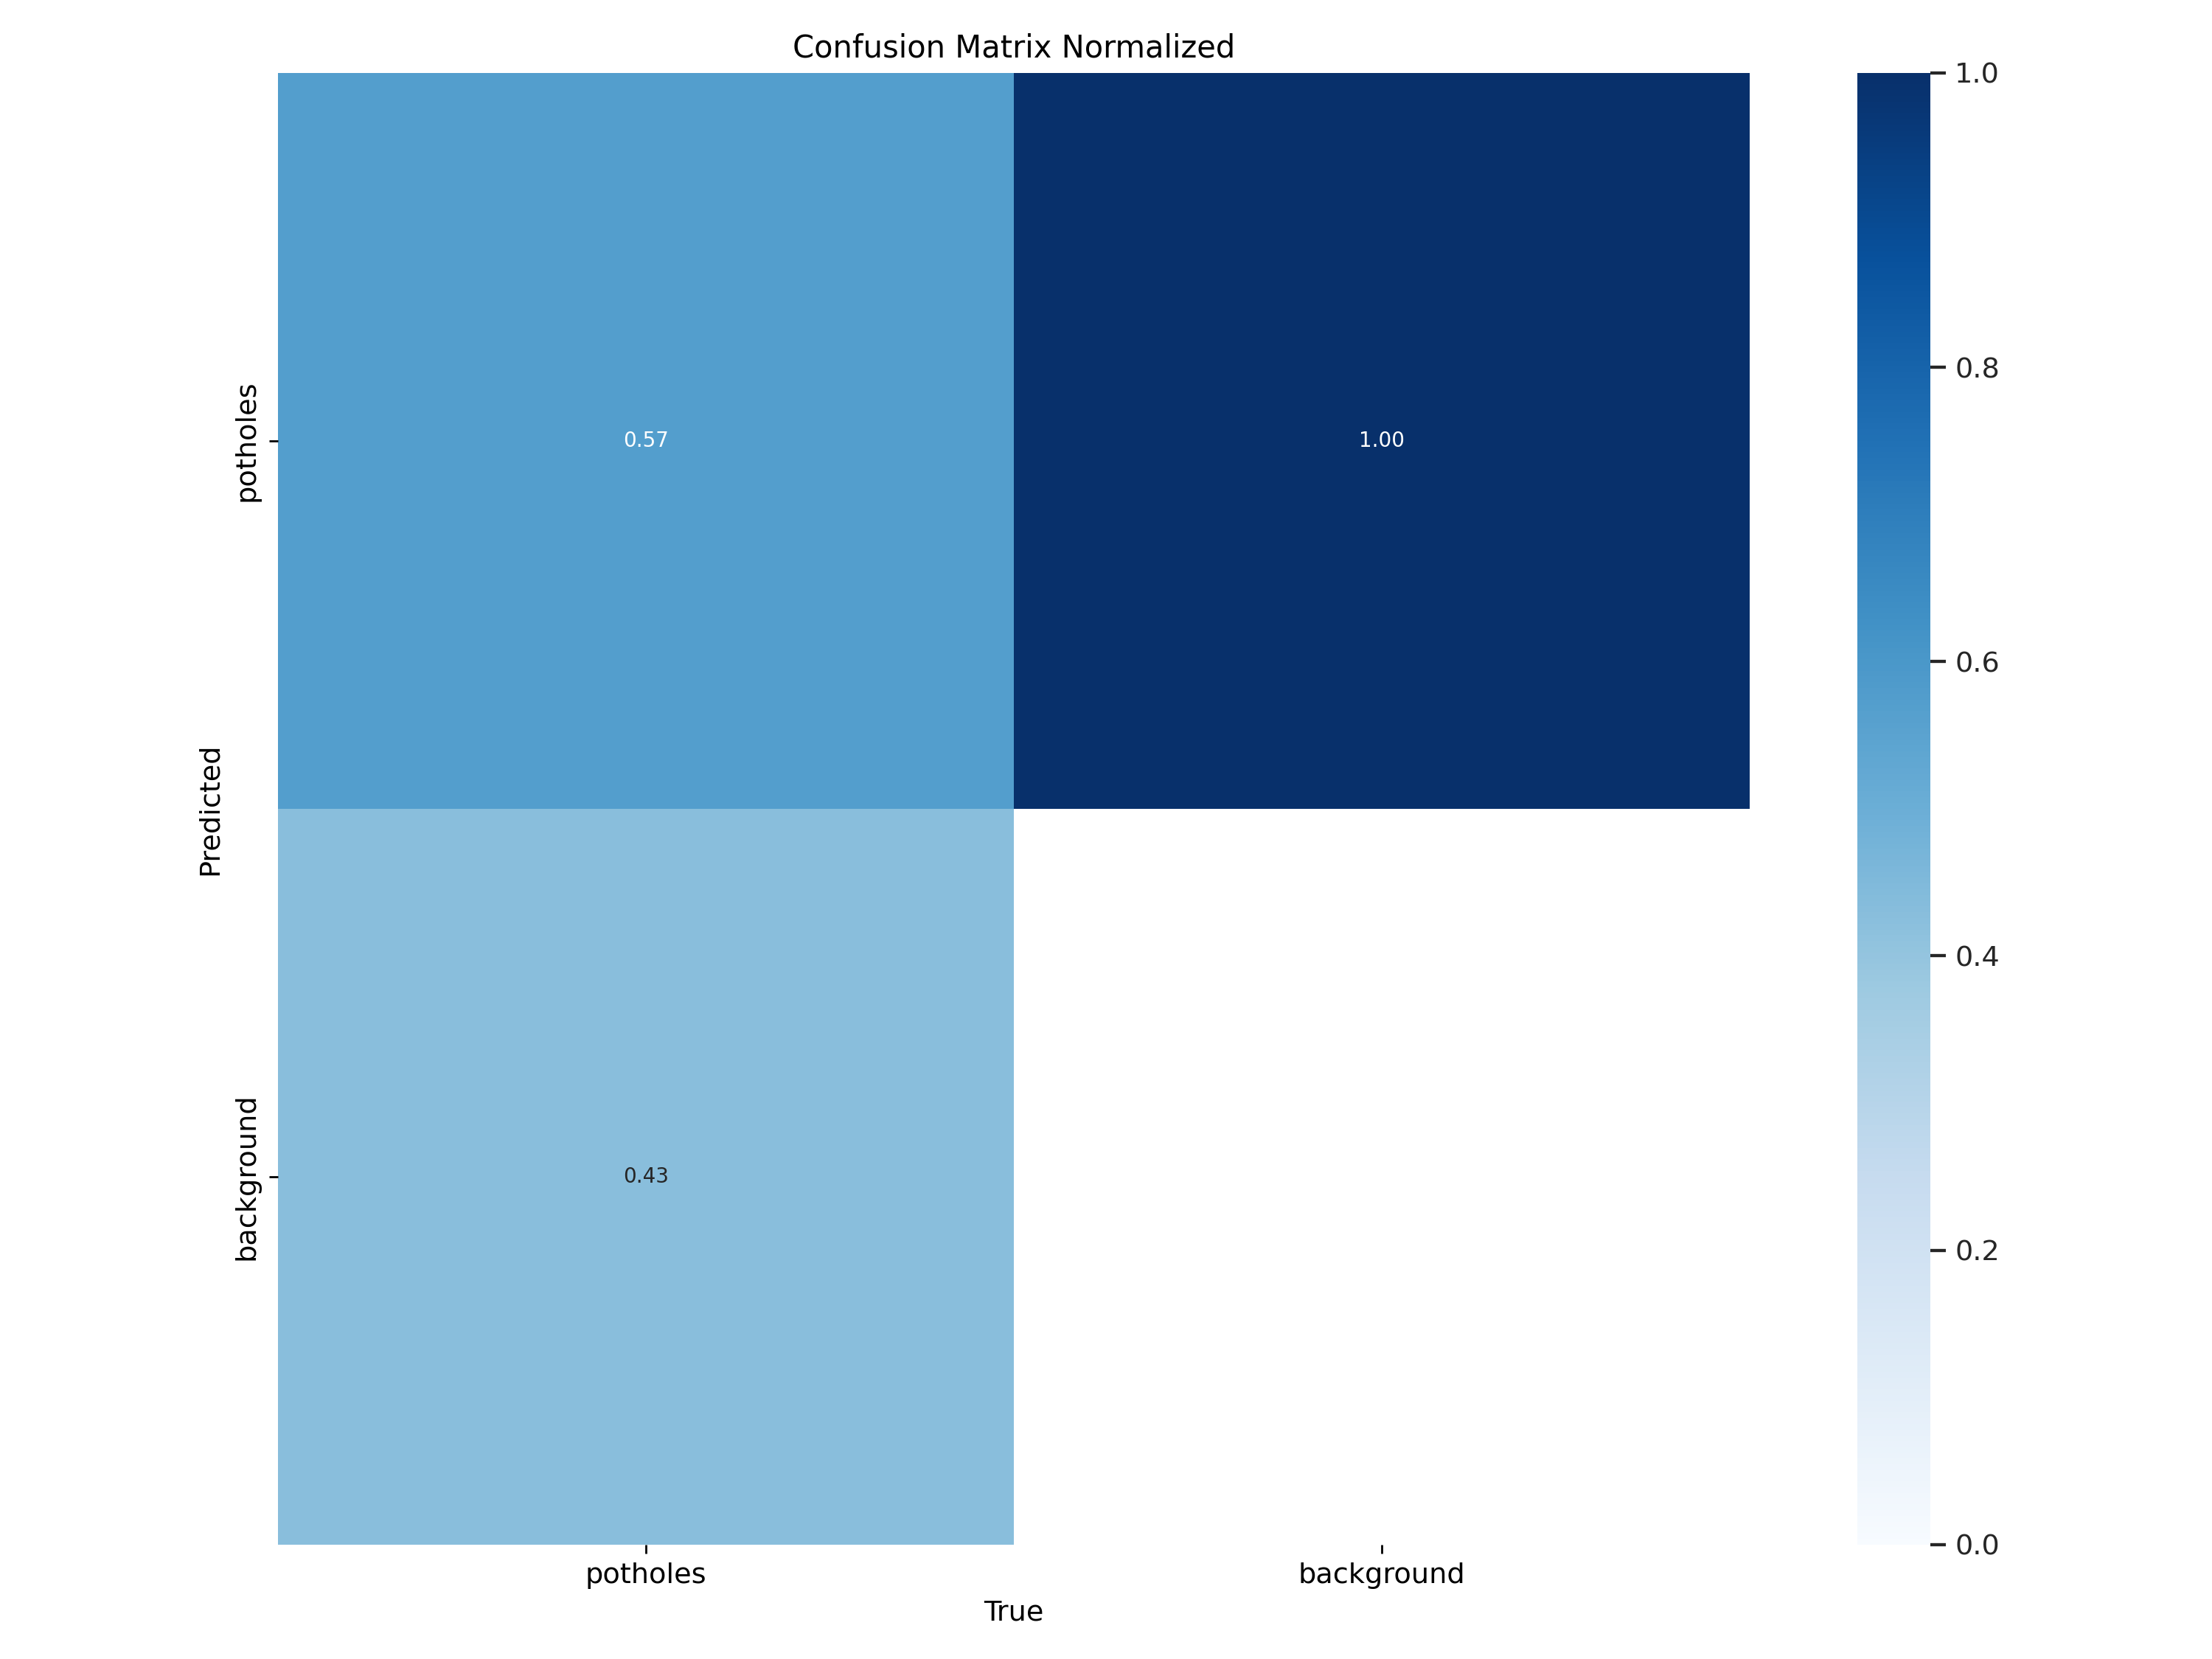

In [26]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=900)

/content


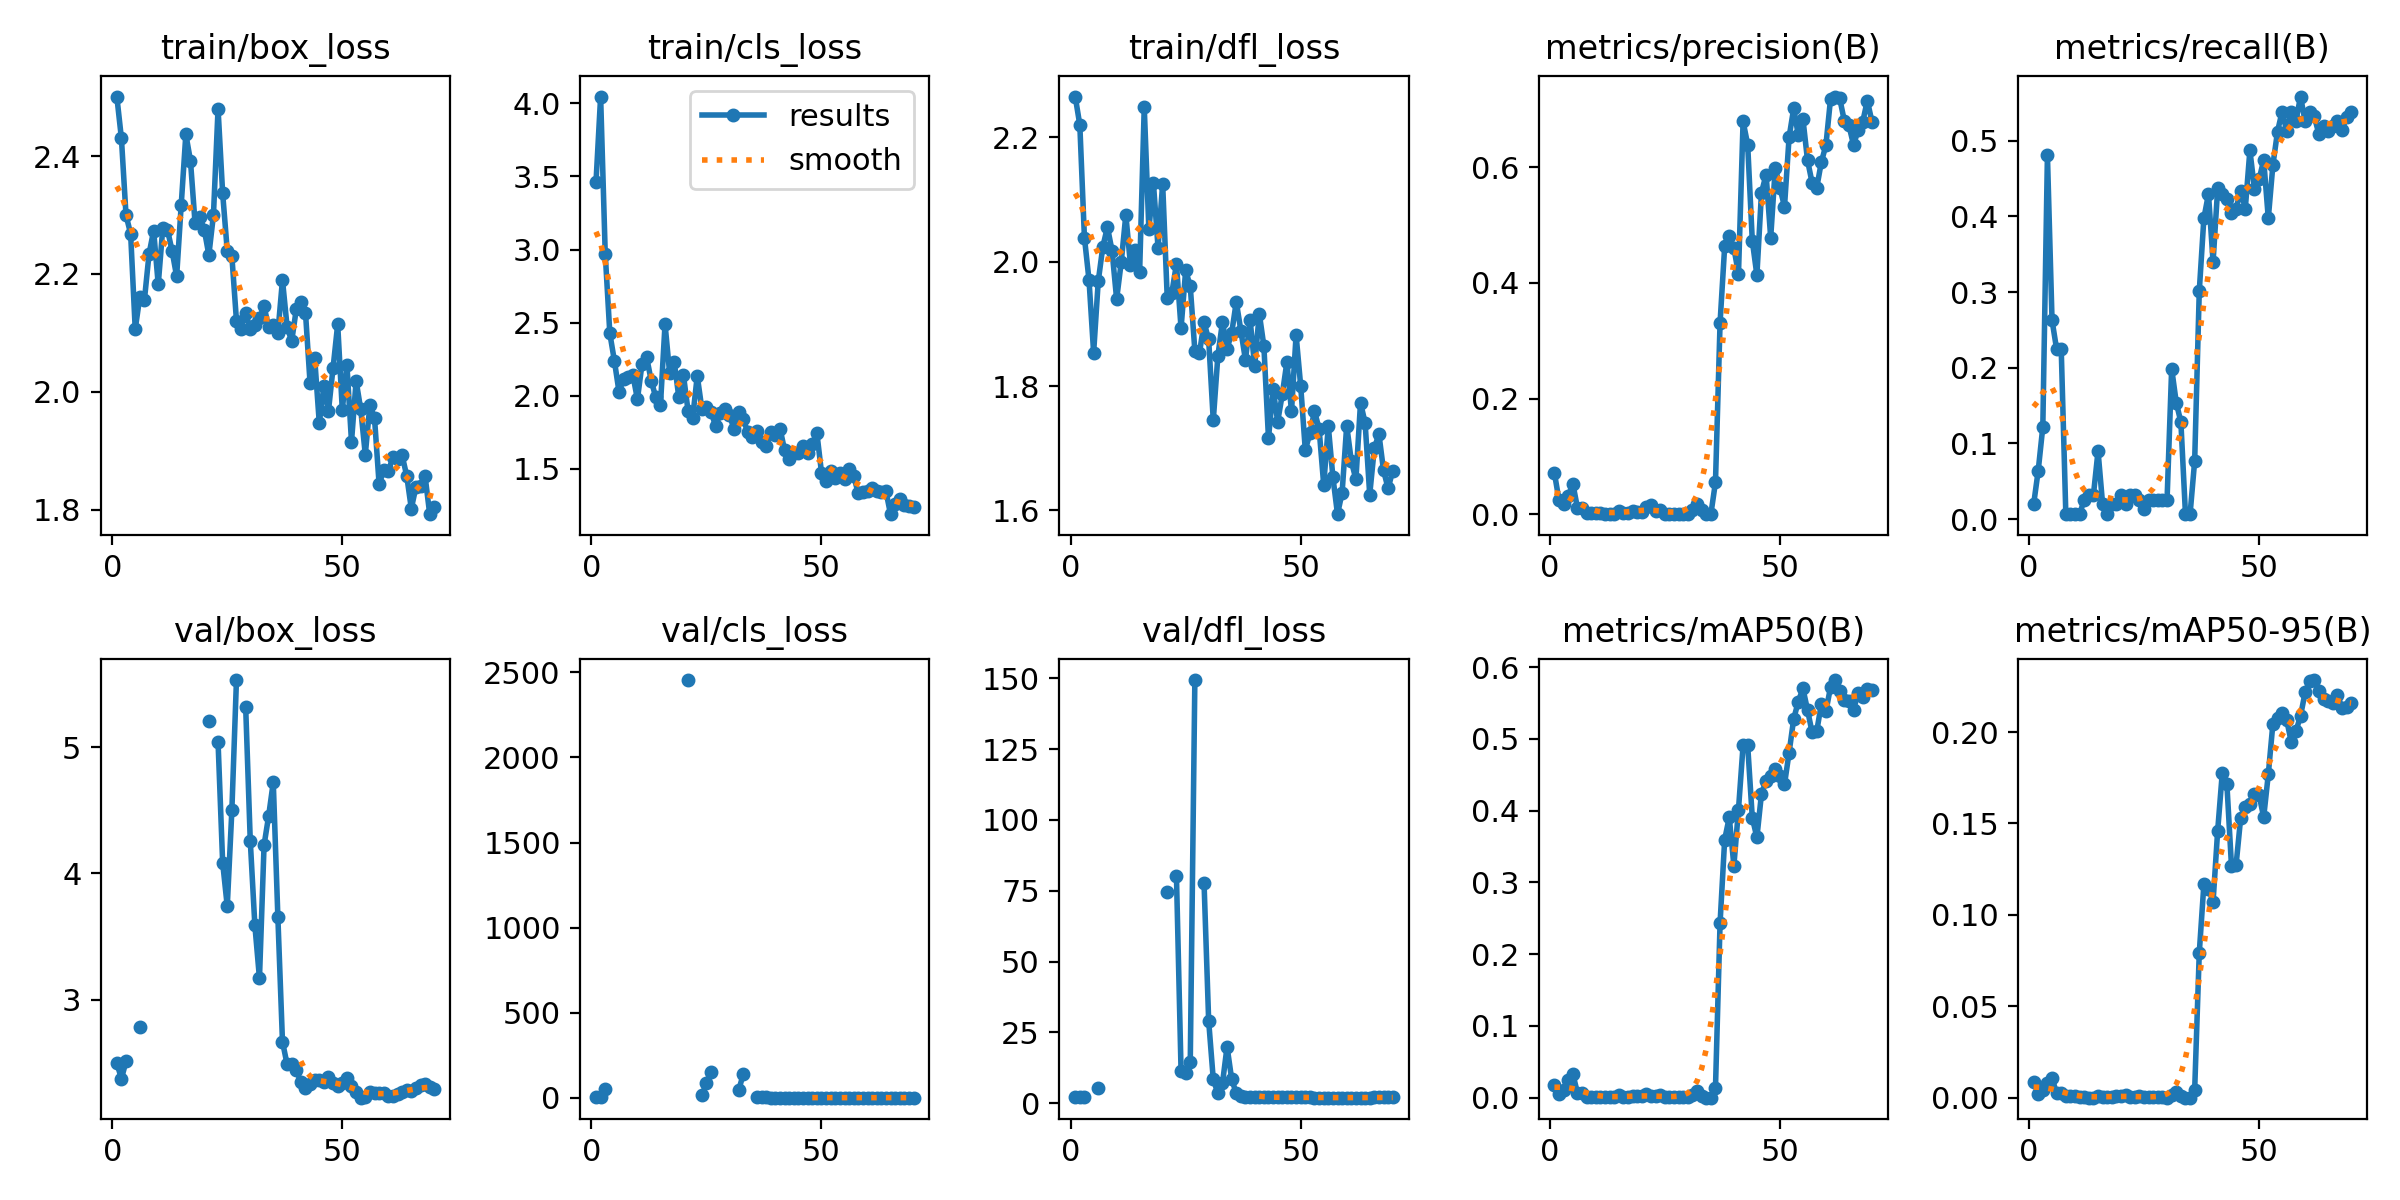

In [27]:
# Here is the graph of the training and validation loss
# bos loss and class loss is important
# the behavior of the model is convincing the model is coverging, Training more will give better results

%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


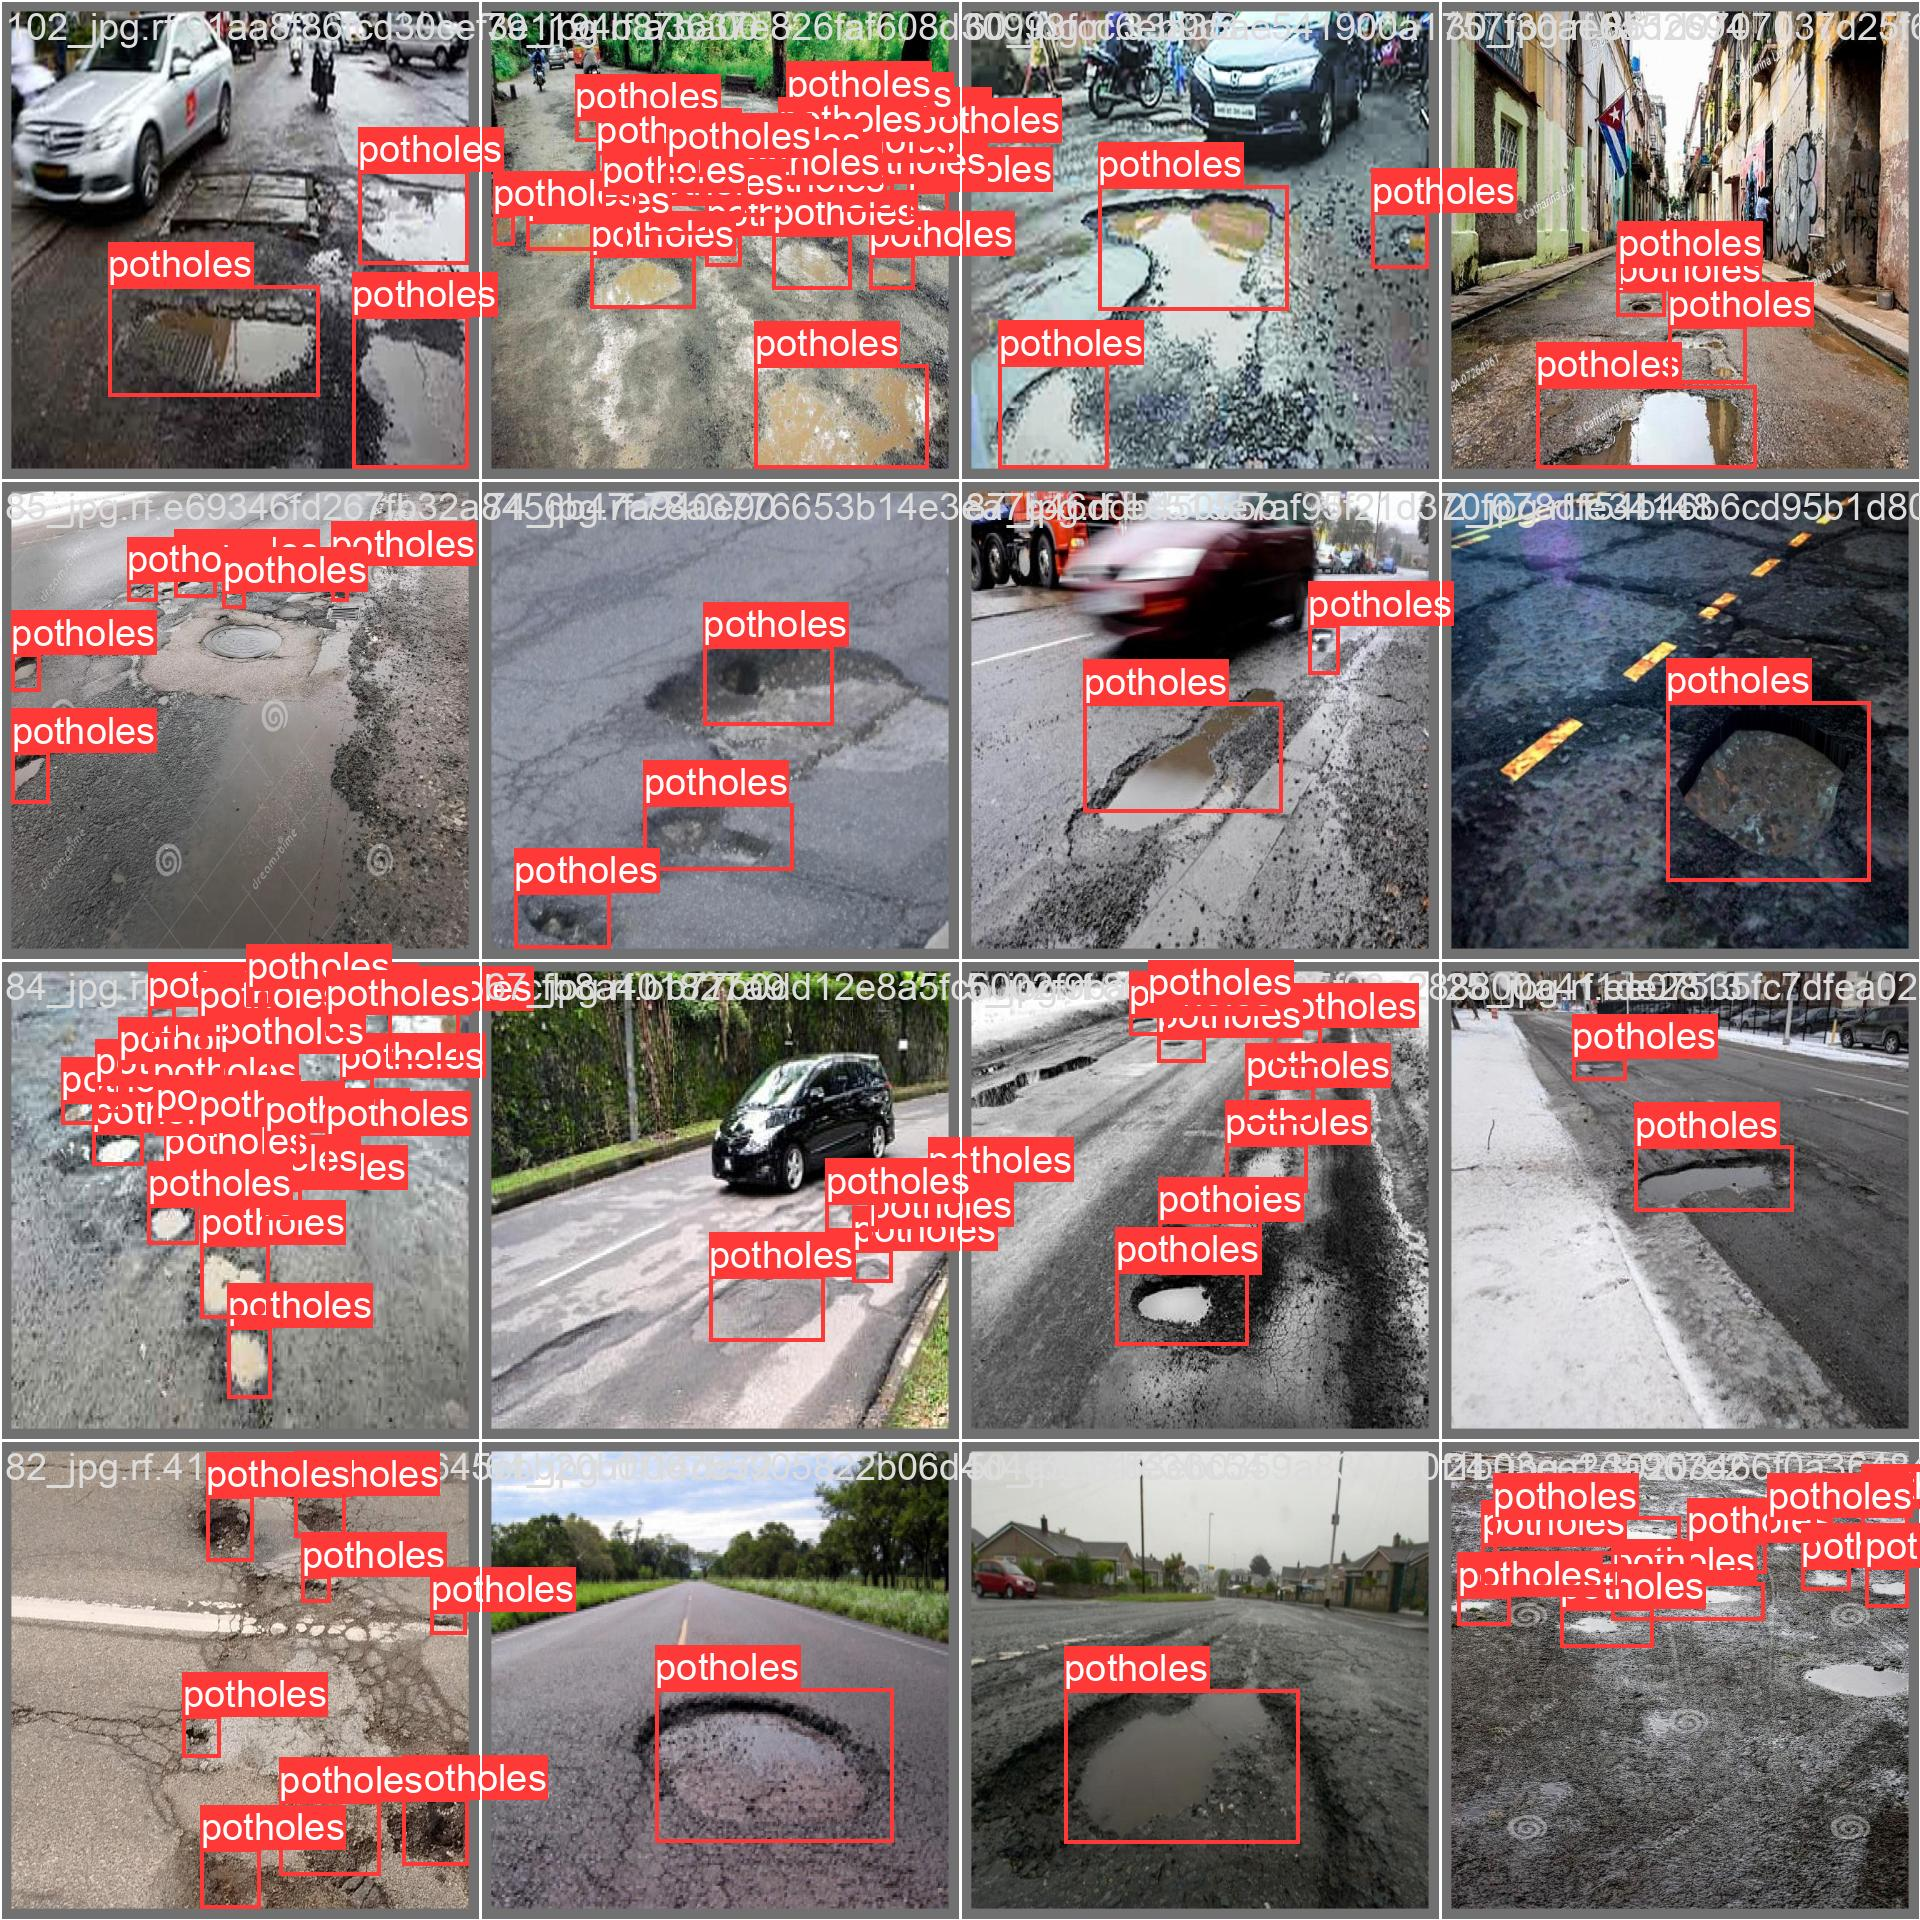

In [28]:
# Model Prediction on validation batch. These image are not used strictly for taining so it is always better to take a
# look and see how model is behaving

%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=1000)

In [29]:
# Here, we are taking the model best weights and using them to validatae the model. Similarly as before we are using
# CLT to do that, The only difference is our mode = val ........ instead of train
# Validation Script is using test dataset that was not used before

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/PotHolesYOLOv8/data.yaml

/content
Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients
val: Scanning /content/datasets/PotHolesYOLOv8/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.18s/it]
                   all         21        156      0.723      0.532      0.581      0.228
Speed: 0.2ms preprocess, 47.6ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/val


# Inference with Custom Model

In [31]:
# Testing the Model on Test Dataset images

%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/PotHolesYOLOv8/test/images

/content
Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

image 1/10 /content/datasets/PotHolesYOLOv8/test/images/22_jpg.rf.a859929ba42daf2f91434303df5e6876.jpg: 640x640 4 potholess, 59.2ms
image 2/10 /content/datasets/PotHolesYOLOv8/test/images/26_jpg.rf.fcd4f1287205f71710e62b98b3f64bb7.jpg: 640x640 3 potholess, 55.6ms
image 3/10 /content/datasets/PotHolesYOLOv8/test/images/31_jpg.rf.58fb7b9d7c01e36c182656f458e3bf0b.jpg: 640x640 5 potholess, 55.6ms
image 4/10 /content/datasets/PotHolesYOLOv8/test/images/36_jpg.rf.40ae7f6da6280a96ee517e05b999a9ca.jpg: 640x640 7 potholess, 55.6ms
image 5/10 /content/datasets/PotHolesYOLOv8/test/images/39_jpg.rf.4072cbae575c144eaa497bbf101e37b0.jpg: 640x640 8 potholess, 34.0ms
image 6/10 /content/datasets/PotHolesYOLOv8/test/images/43_jpg.rf.dd01b3b27f78405a66961baed64f85b5.jpg: 640x640 7 potholess, 34.0ms
image 7/10 /content/datasets/PotHolesYOLOv

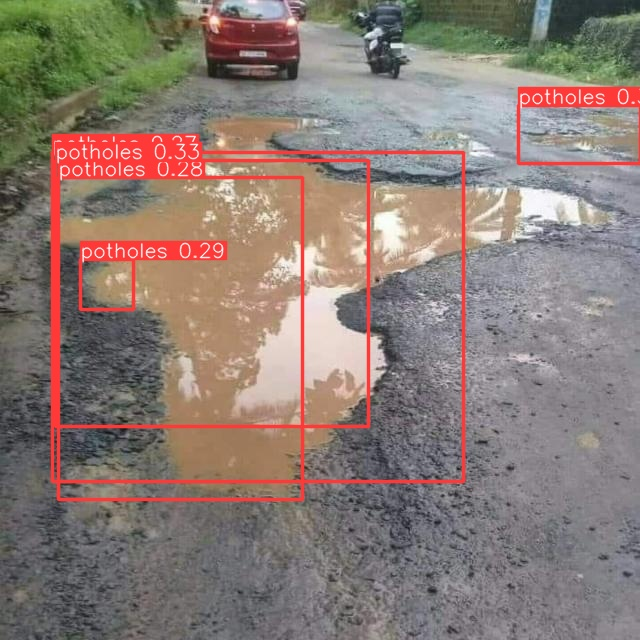

In [33]:
Image("/content/runs/detect/predict/31_jpg.rf.58fb7b9d7c01e36c182656f458e3bf0b.jpg")

# Testing on a Demo Video

In [42]:
!gdown "https://drive.google.com/drive/u/1/folders/1JQXs2Cyh5OWSloMIko3NJqvqZzi0ScbS"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/1/folders/1JQXs2Cyh5OWSloMIko3NJqvqZzi0ScbS
To: /content/1JQXs2Cyh5OWSloMIko3NJqvqZzi0ScbS
620kB [00:00, 11.0MB/s]


In [44]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4'

/content
Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

video 1/1 (1/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 6 potholess, 121.1ms
video 1/1 (2/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 5 potholess, 34.0ms
video 1/1 (3/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 3 potholess, 34.1ms
video 1/1 (4/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 3 potholess, 34.0ms
video 1/1 (5/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 4 potholess, 34.0ms
video 1/1 (6/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 4 potholess, 34.0ms
video 1/1 (7/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8/demo.mp4: 384x640 3 potholess, 22.2ms
video 1/1 (8/324) /content/drive/MyDrive/yolov8/Training Custom YOLOv8

# Display the Demo Video

In [45]:
!rm "/content/results_compressed.mp4"

rm: cannot remove '/content/results_compressed.mp4': No such file or directory


In [46]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path = '/content/runs/detect/predict2/demo.avi'

compressed_path = "/content/results_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
"""% data_url)